In [ ]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 101kB/s 


In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 962kB 20.3MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=7391a8946923aa178c5440cb62255aad3592436fc081d1efd145993bc3bd65ac
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=475809ed9a1fedcdfad14c63aa19f50c7693d4938c1408bb8ecf40ef44eee682
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4096 sha256=ef26b94ef6907b660c5e7c245f094a88b2724eff2fc111cac4ac5a16737db560
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [ ]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-09-21 12:28:00--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.25.34, 104.16.26.34, 104.16.3.35, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.25.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-09-21 12:28:00 (96.6 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [ ]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [ ]:
reader = easyocr.Reader(['hi'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


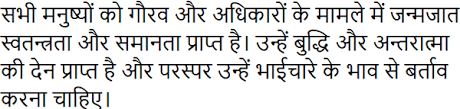

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("download.png")
im

In [ ]:
bounds = reader.readtext('download.png', add_margin=0.60, width_ths=0.50, link_threshold=0.60, decoder='beamsearch', blocklist='=-')
bounds

[([[0, 0], [306, 0], [306, 48], [0, 48]],
  'सभी मनुष्यों को गौरव और अधिकारों वे',
  0.001281293691135943),
 ([[300, 0], [460, 0], [460, 38], [300, 38]],
  ' मामले में जन्मजात',
  0.018528573215007782),
 ([[0, 12], [460, 12], [460, 72], [0, 72]],
  'स्वतन्तता और समानता प्राप्त है। उन्हें बुद्धि और अन्तरात्मा',
  0.00015536395949311554),
 ([[0, 40], [334, 40], [334, 100], [0, 100]],
  'की देन प्राप्त है और परस्पर उन्हें भाईचारे वे',
  0.03830145299434662),
 ([[390, 42], [460, 42], [460, 94], [390, 94]],
  'ने बर्ताव',
  0.021356195211410522),
 ([[336, 52], [390, 52], [390, 90], [336, 90]], ' भाव `', 0.14678087830543518),
 ([[0, 78], [116, 78], [116, 109], [0, 109]],
  'करना चाहिए।',
  0.30970489978790283)]

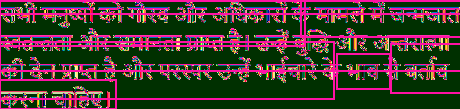

In [ ]:
def draw_boxes(image, bounds, color = 'yellow', width=1):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width = width)
  return image

draw_boxes(im, bounds)

In [ ]:
text_list = reader.readtext('download.png', add_margin=0.65, width_ths=0.6, link_threshold=0.8, decoder='beamsearch', blocklist='=-',detail=0)
text_list

['सभी मनुष्य को गौरव और अधिकारों के',
 ' मामले में जन्मजात',
 'स्वतन्तता और समानता प्राप्त है उन्हेंबुद्धि और अन्तरात्मा',
 'की देन प्राप्त है और परस्पर उन्हें भाईचारे वै',
 'पे बर्ताव',
 ' भाव र',
 'करना चाहिए।']

In [ ]:
text_comb=' '.join(text_list)
text_comb

'सभी मनुष्य को गौरव और अधिकारों के  मामले में जन्मजात स्वतन्तता और समानता प्राप्त है उन्हेंबुद्धि और अन्तरात्मा की देन प्राप्त है और परस्पर उन्हें भाईचारे वै पे बर्ताव  भाव र करना चाहिए।'

In [ ]:
print(translator.detect(text_comb))

Detected(lang=hi, confidence=1.0)


In [ ]:
text_en = translator.translate(text_comb, src = 'hi')
print(text_en.text)

All human beings have inherent freedom and equality in terms of pride and rights, they have the wisdom and wisdom of the soul and they should treat each other with brotherhood.


In [ ]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [ ]:
Audio('trans.mp3', autoplay = True)

In [ ]:
ta_tts = gTTS(text_en.text, lang ='hi')
ta_tts.save('trans.mp3')

Audio('trans.mp3', autoplay = True)

In [ ]:
text_in = translator.translate(text_comb, src = 'hi', dest = 'te')
print(text_in.text)

ta_tts=gTTS(text_in.text, lang = 'te')
ta_tts.save('trans_te.mp3')

Audio('trans_te.mp3', autoplay = True)

మానవులందరికీ అహంకారం మరియు హక్కుల పరంగా స్వాభావిక స్వేచ్ఛ మరియు సమానత్వం ఉంది, వారికి ఆత్మ యొక్క జ్ఞానం మరియు జ్ఞానం ఉన్నాయి మరియు వారు ఒకరినొకరు సోదరభావంతో వ్యవహరించాలి.


In [ ]:
text_fr = translator.translate(text_comb, src = 'ta', dest = 'fr')
print(text_fr.text)

ta_tts=gTTS(text_fr.text, lang = 'fr')
ta_tts.save('trans_fr.mp3')

Audio('trans_fr.mp3', autoplay = True)

Le premier produit paranormal de l'Inde fabriqué sans aucun additif chimique contenant des ingrédients actifs extraits d'herbes naturelles
